# Project Foundations for Data Science: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Applied Data Science Spring 24/Project 1: Foundations for Data Science/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
df.shape

(1898, 9)

#### Observations:

There are 9 columns and 1898 rows.


### **Question 2:** What are the datatypes of the different columns in the dataset?

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

As we can see above, there are 4 columns with datatype int64, 4 columns with datatype object, and one column with the datatype float64.

### **Question 3:** Are there any missing values in the data?

In [ ]:
df.isnull().any()

order_id                 False
customer_id              False
restaurant_name          False
cuisine_type             False
cost_of_the_order        False
day_of_the_week          False
rating                   False
food_preparation_time    False
delivery_time            False
dtype: bool

In [ ]:
df.duplicated().sum()

0

#### Observations:

There are no null values and no duplicates in the dataset.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:

On average, it takes ~27 mins for the food to be prepared, with the minimum time being 20 mins and maximum time 35 mins.

### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:

736 orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore the variables and provide observations on their distributions.

#### Numerical columns

In [ ]:
df['order_id'].nunique()

1898

In [ ]:
df['customer_id'].nunique()

1200

<Axes: title={'center': 'box plots for numerical columns'}>

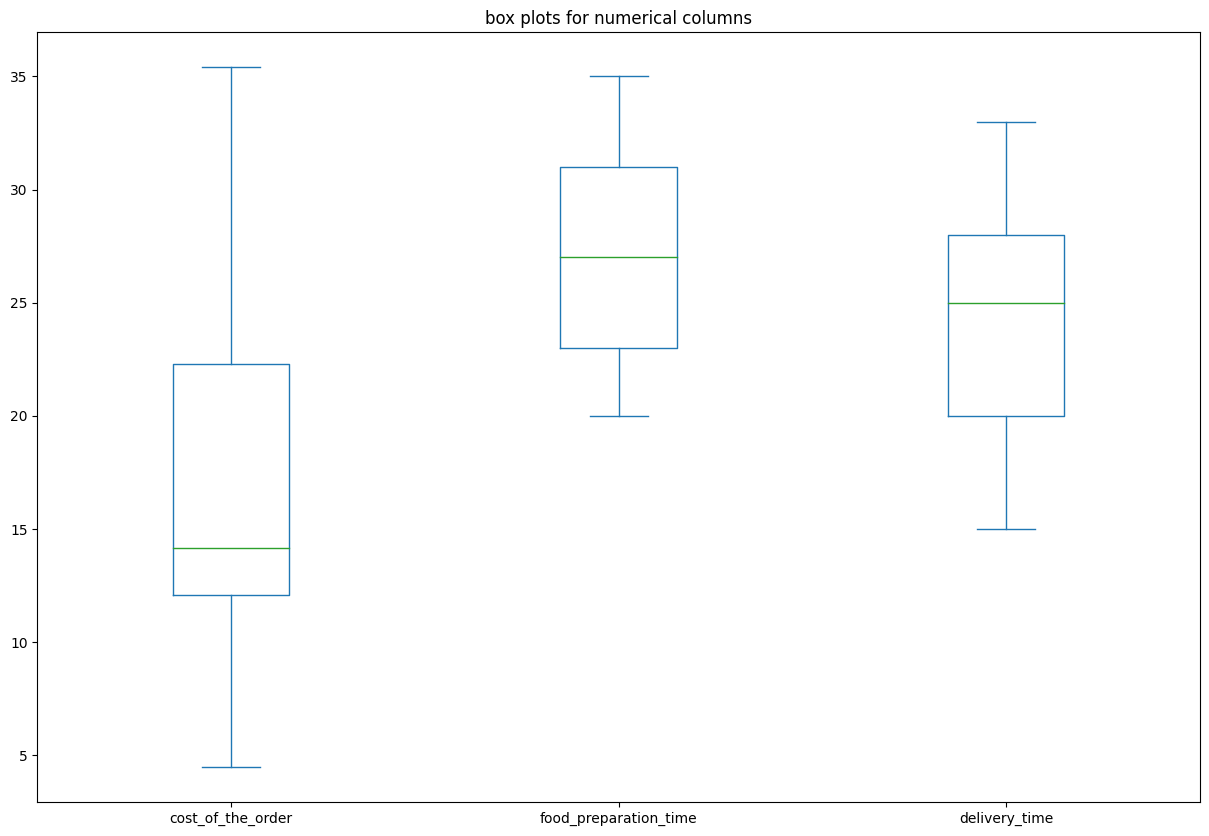

In [ ]:
#cost_of_the_order, food_preparation_time, delivery_time
#box plots
df[['cost_of_the_order','food_preparation_time', 'delivery_time']].plot.box(sharey=True, figsize=(15,10), title='box plots for numerical columns', whis=1.5)

<Axes: title={'center': 'delivery_time'}, ylabel='Density'>

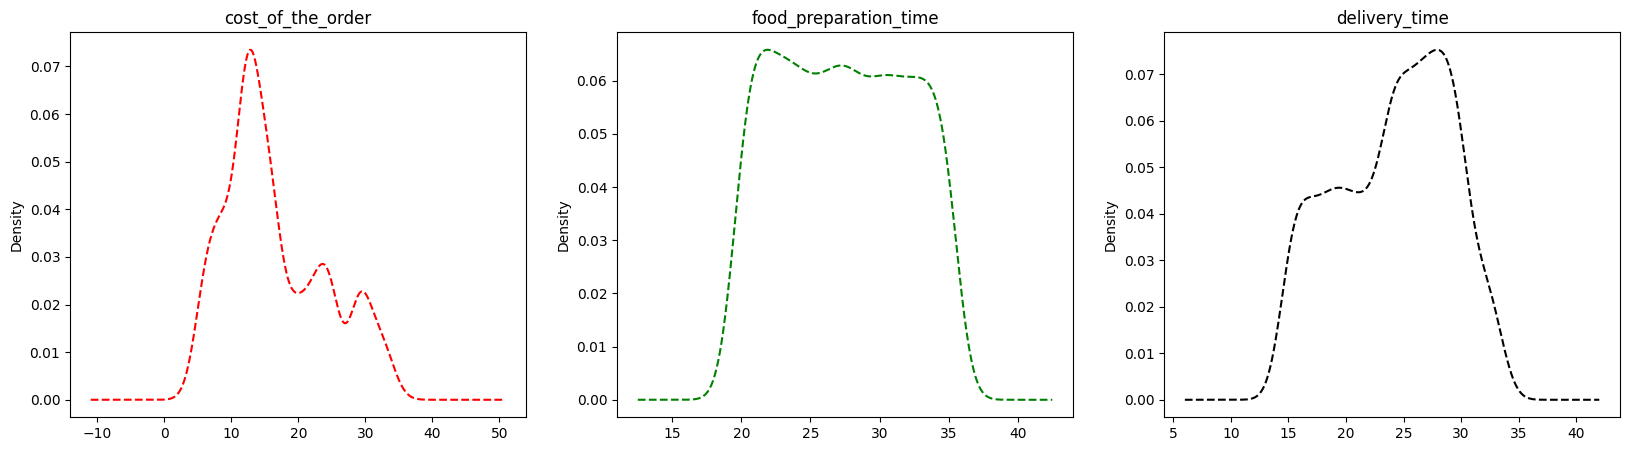

In [ ]:
#density plots
fig, axs=plt.subplots(1,3, figsize=(20,5))
df['cost_of_the_order'].plot.density(ax=axs[0], color='red', linestyle='--', title='cost_of_the_order')
df['food_preparation_time'].plot.density(ax=axs[1], color='green', linestyle='--', title='food_preparation_time')
df['delivery_time'].plot.density(ax=axs[2], color='black', linestyle='--', title='delivery_time')


<Axes: title={'center': 'delivery_time'}, ylabel='Frequency'>

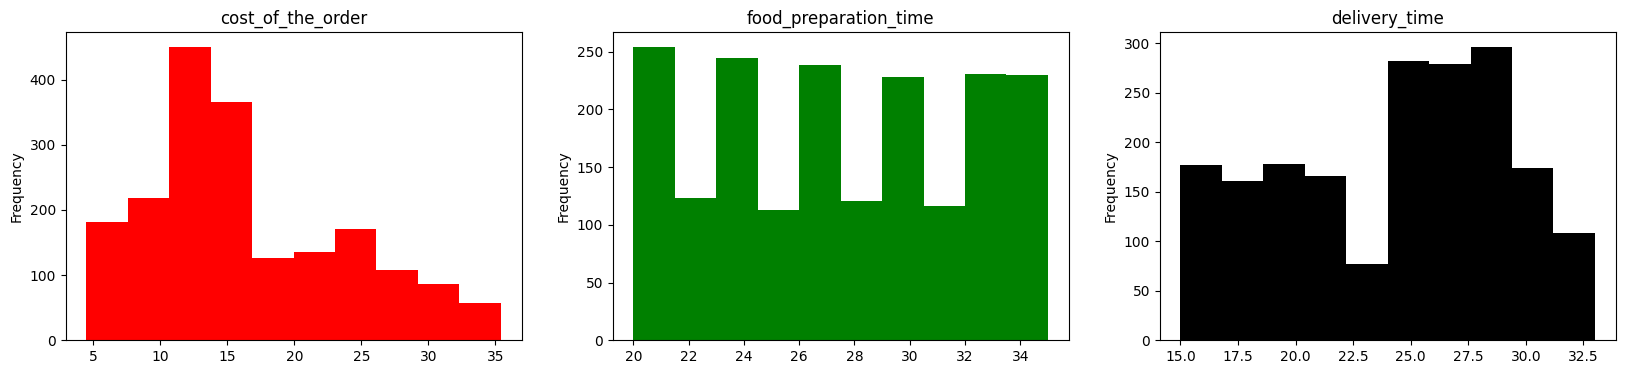

In [ ]:
#histogram plots
fig, axs=plt.subplots(1,3, figsize=(20,4))
df['cost_of_the_order'].plot.hist(ax=axs[0], color='red', title='cost_of_the_order')
df['food_preparation_time'].plot.hist(ax=axs[1], color='green', title='food_preparation_time')
df['delivery_time'].plot.hist(ax=axs[2], color='black', title='delivery_time')


In [ ]:
df.cost_of_the_order.skew()

0.6217469995871637

In [ ]:
df.food_preparation_time.skew()

0.03646881825816354

In [ ]:
df.delivery_time.skew()

-0.23653630513419896

In [ ]:
df.food_preparation_time.describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

##### Numerical Observations:

All order_id within our dataset are unique, and we have 1200 unique customer_id. I did not further explore these variables are they are ids.

**1. cost_of_the_order (cost)**

*   There are no outliers
*   It has a moderately right skewed distribution
*   The majority of orders are between 10-20$

**2. food_preparation_time (prep_time)**

*   There are no outliers
*   It has a symmetrical distribution
*   It takes a least 20 mins and a max 35 mins for the food to be prepared by the restaurant

**3. delivery_time**


*   There are no outliers
*   It has an approximately symmetrical distribution
*   It takes at least 15 mins and a max of ~33 minutes for food to be delivered -- it is hard to make assumptions on why this is the case because we would want to know the mode of transport of the driver and the distance between the customer and the restaurant.

**Additional Comments**

 It will also be interesting to see the correlation between these three numerical values and the rating the customer gives.

####Categorical Columns

<Axes: xlabel='rating'>

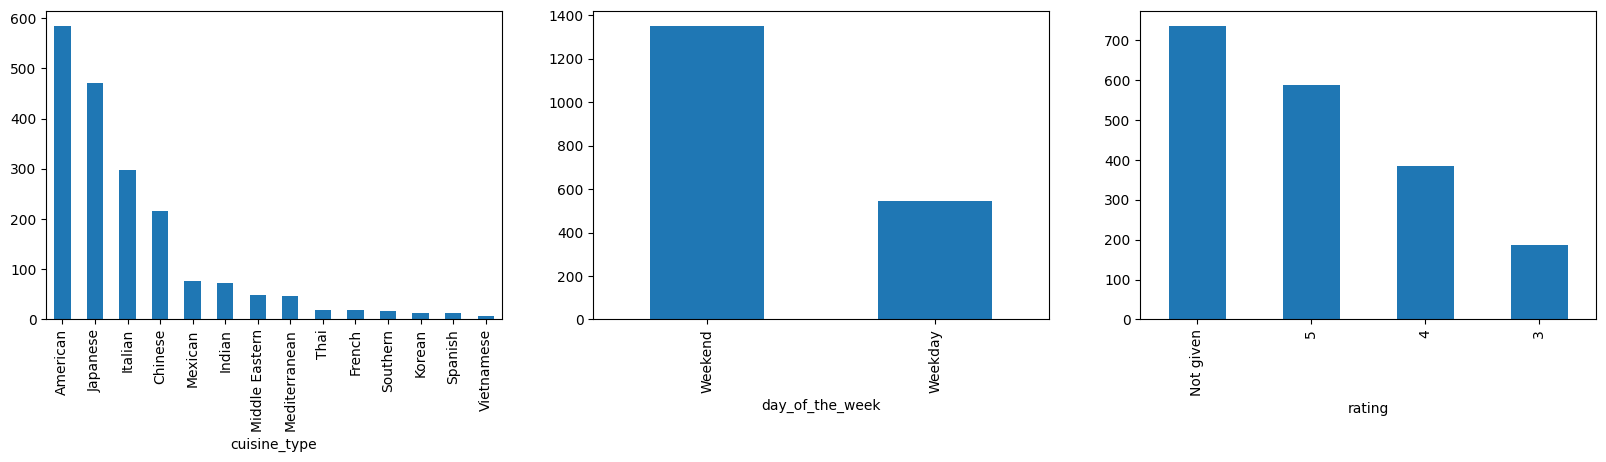

In [ ]:
#restaurant name, cuisine_type, day_of_the_week, rating
#bar plots
fig, axs=plt.subplots(1,3, figsize=(20,4))

df['cuisine_type'].value_counts().plot(ax=axs[0], kind='bar')
df['day_of_the_week'].value_counts().plot(ax=axs[1], kind='bar')
df['rating'].value_counts().plot(ax=axs[2], kind='bar')


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


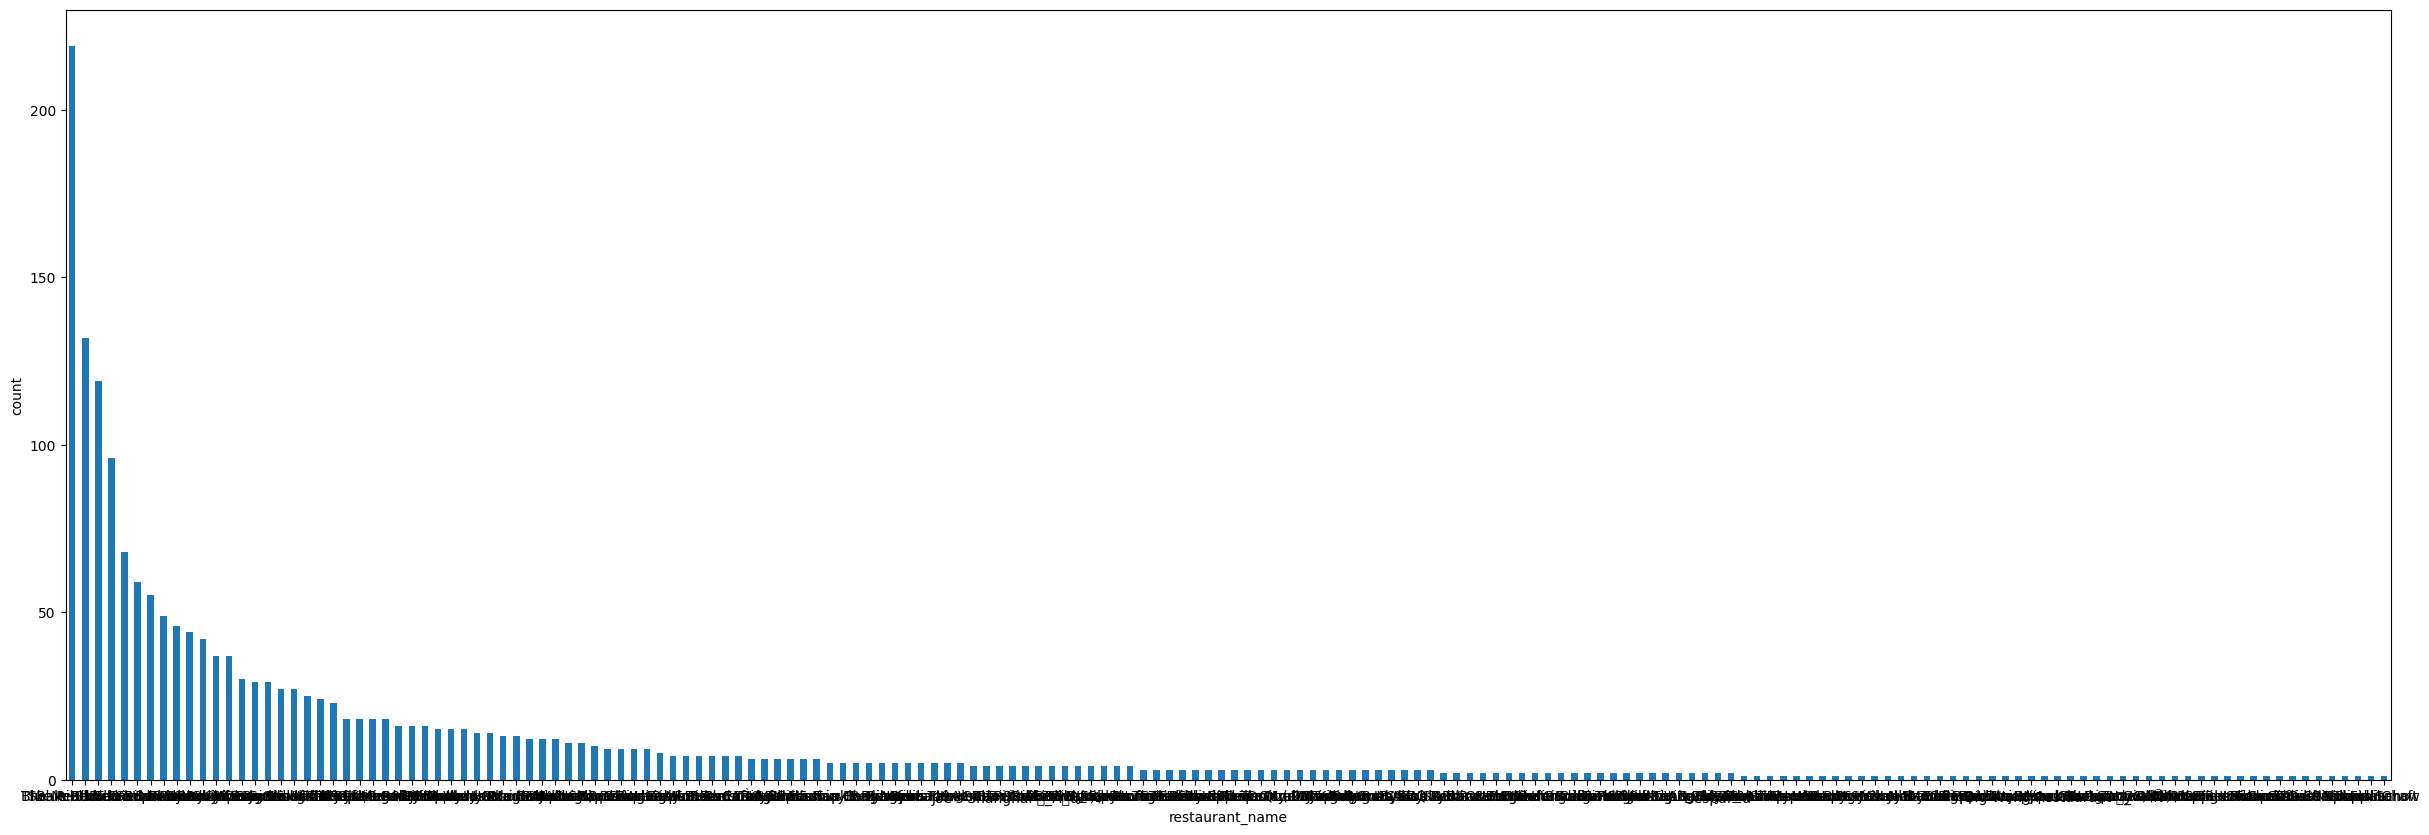

In [ ]:
fig = plt.subplots(figsize=(30,10))
df['restaurant_name'].value_counts().plot(kind='bar', rot=0, ylabel='count')
plt.show()

In [ ]:
df['restaurant_name'].nunique()

178

In [ ]:
df['restaurant_name'].value_counts(normalize=True)

restaurant_name
Shake Shack                  0.115385
The Meatball Shop            0.069547
Blue Ribbon Sushi            0.062698
Blue Ribbon Fried Chicken    0.050580
Parm                         0.035827
                               ...   
Sushi Choshi                 0.000527
Dos Caminos Soho             0.000527
La Follia                    0.000527
Philippe Chow                0.000527
'wichcraft                   0.000527
Name: proportion, Length: 178, dtype: float64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


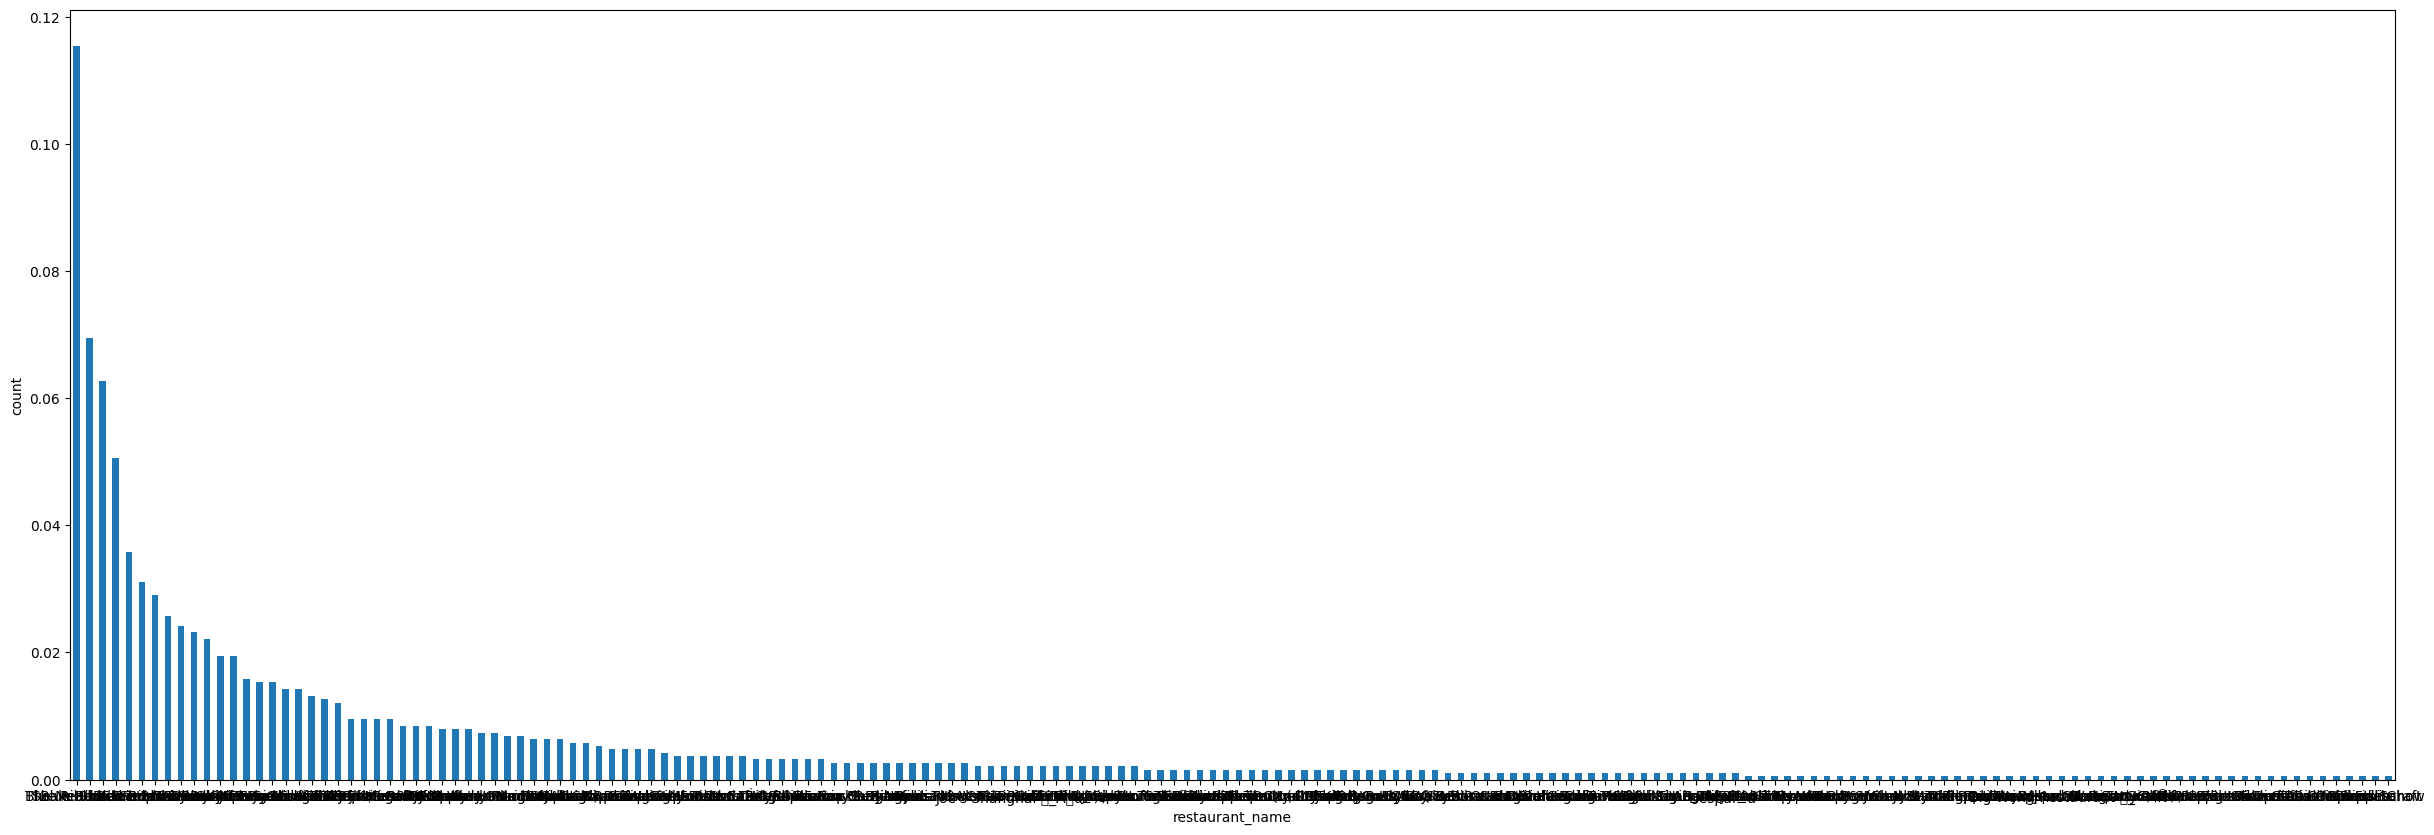

In [ ]:
#normalized
fig = plt.subplots(figsize=(30,10))
df['restaurant_name'].value_counts(normalize=True).plot(kind='bar', rot=0, ylabel='count')
plt.show()

In [ ]:
df['cuisine_type'].value_counts(normalize=True)

cuisine_type
American          0.307692
Japanese          0.247629
Italian           0.157007
Chinese           0.113277
Mexican           0.040569
Indian            0.038462
Middle Eastern    0.025817
Mediterranean     0.024236
Thai              0.010011
French            0.009484
Southern          0.008957
Korean            0.006849
Spanish           0.006322
Vietnamese        0.003688
Name: proportion, dtype: float64

In [ ]:
df['day_of_the_week'].value_counts(normalize=True)

day_of_the_week
Weekend    0.711802
Weekday    0.288198
Name: proportion, dtype: float64

In [ ]:
df['rating'].value_counts(normalize=True)

rating
Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: proportion, dtype: float64

#####Categorical Observations


1. Cuisine Type


*   American and Japanese cuisine make up over 50% of the orders
*   The top 4 cuisines make up over 80% of all orders
*   Vietnamese is the lowest ordered cuisine type

2. Day of the Week

*   Most of the orders are placed on the weekend (71%) vs the weekday (29%)

3. Rating

* About 31% of orders receive a 5star rating
* 39% of orders dont have a rating

4. Restaurant Name

* Shake Shack is a clear leader in orders making up 11% of total orders, is there a promotional offer on foodhub for shake shack?
* The top 5 restaurants in terms of orders, make up 32% of all orders





### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
#looking at top 10 (we only need top 5)
df['restaurant_name'].value_counts().head(10)

restaurant_name
Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: count, dtype: int64

#### Observations:

The top 5 in order are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
df.groupby('cuisine_type')['day_of_the_week'].value_counts().sort_values(ascending= False)

cuisine_type    day_of_the_week
American        Weekend            415
Japanese        Weekend            335
Italian         Weekend            207
American        Weekday            169
Chinese         Weekend            163
Japanese        Weekday            135
Italian         Weekday             91
Mexican         Weekend             53
Chinese         Weekday             52
Indian          Weekend             49
Middle Eastern  Weekend             32
Mediterranean   Weekend             32
Indian          Weekday             24
Mexican         Weekday             24
Middle Eastern  Weekday             17
Thai            Weekend             15
Mediterranean   Weekday             14
French          Weekend             13
Korean          Weekend             11
Southern        Weekend             11
Spanish         Weekend             11
Southern        Weekday              6
French          Weekday              5
Thai            Weekday              4
Vietnamese      Weekend         

#### Observations:

The most popular cuisine on weekends is American cuisine.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
df[df['cost_of_the_order'] > 20]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22
...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17


In [ ]:
#total rows = 1898

mask = df['cost_of_the_order'] > 20
print(mask.sum()/1898)

0.2924130663856691


#### Observations:

About 29% of the orders are above 20$.

### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:

The mean delivery time is ~ 24 mins.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
df['customer_id'].value_counts()

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64

#### Observations:

The top 3 customer id's with their respective number of orders are: 52832 - 13 orders, 47440 - 10 orders, and 83287 - 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the variables.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


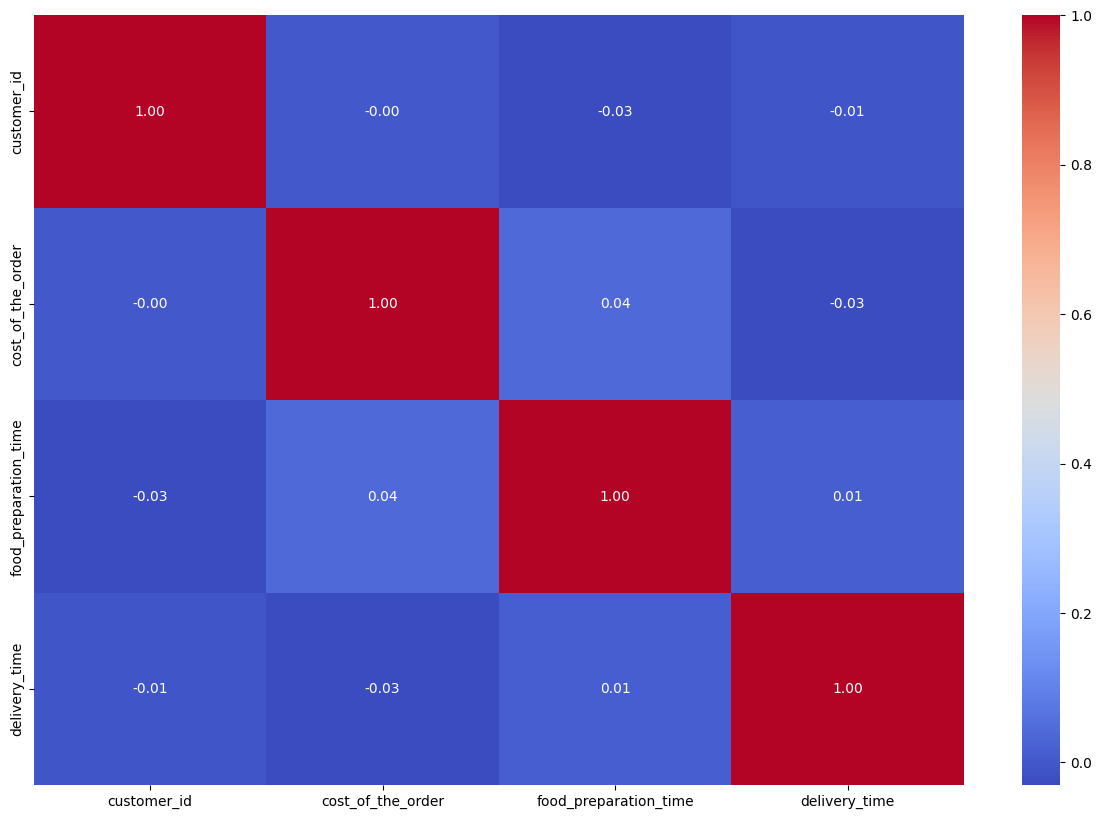

In [ ]:
numeric_col = ['customer_id', 'cost_of_the_order', 'food_preparation_time', 'delivery_time']
corr = df[numeric_col].corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt=".2f", xticklabels= corr.columns, yticklabels= corr.columns);

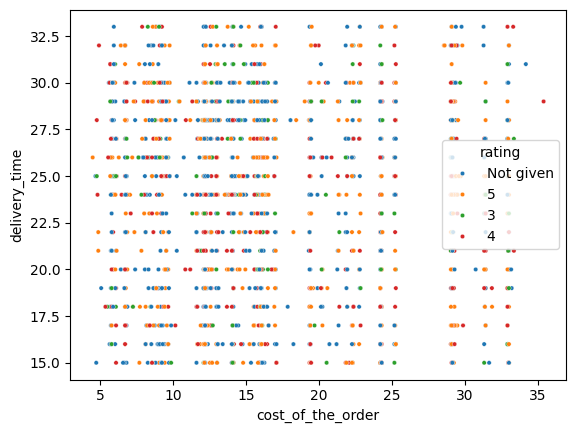

In [ ]:
sns.scatterplot(x=df['cost_of_the_order'], y= df['delivery_time'], hue=df['rating'], s=10);

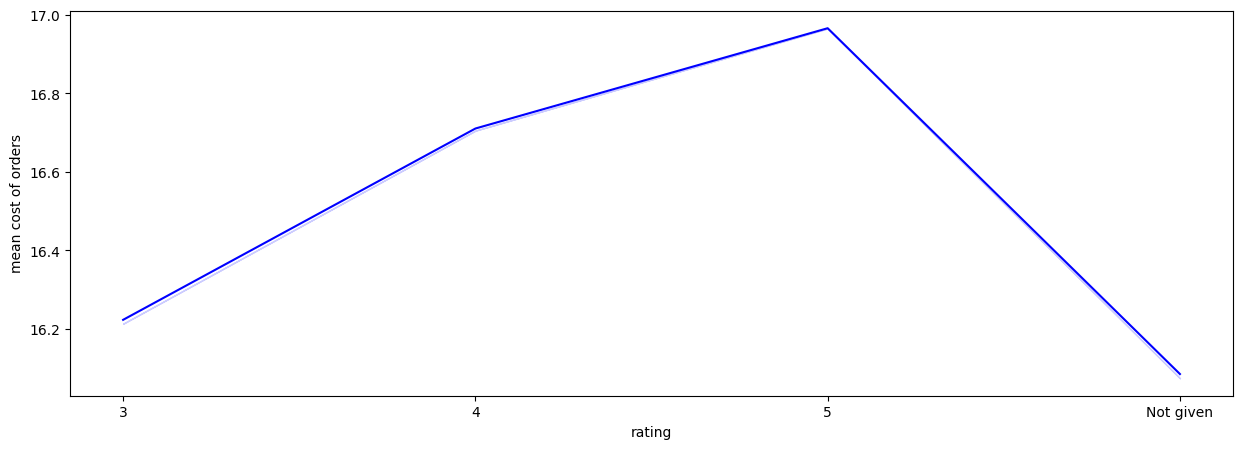

In [ ]:
#by default we get the mean

plt.figure(figsize = (15,5))

df3 = df.sort_values('rating')  # sorting so that i can get a better order on the x-axis for rating

sns.lineplot(x = 'rating', y = 'cost_of_the_order', data = df3, color = 'BLUE', errorbar=('ci',0))

plt.ylabel('mean cost of orders')
plt.xlabel('rating')

plt.show();

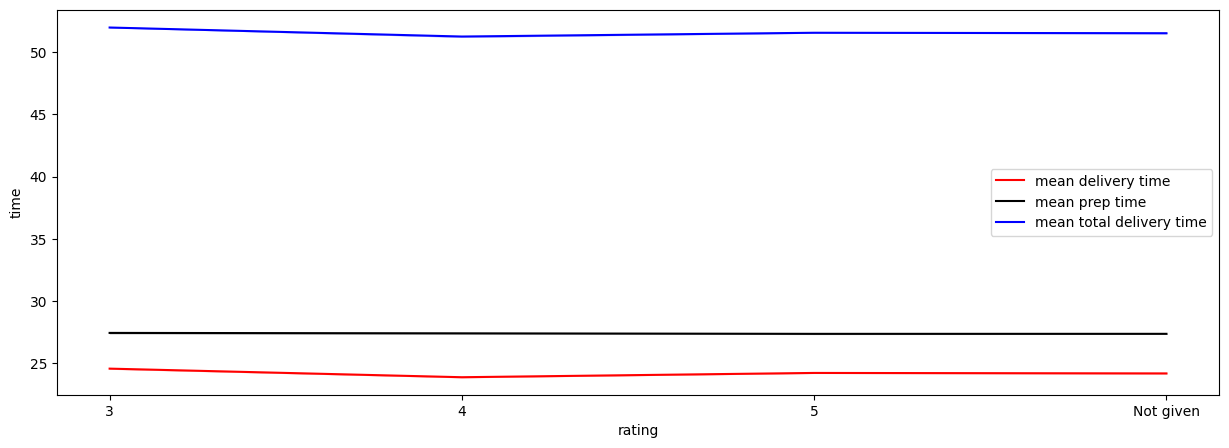

In [ ]:
plt.figure(figsize = (15,5))

df3 = df.sort_values('rating')  # sorting so that i can get a better order on the x-axis for rating
df3['total_delivery_time'] = df3['delivery_time'] + df3['food_preparation_time']

sns.lineplot(x = 'rating', y = 'delivery_time', data = df3, label= 'mean delivery time', color = 'RED', errorbar=('ci',0))
sns.lineplot(x = 'rating', y = 'food_preparation_time', data = df3, label= 'mean prep time', color = 'BLACK', errorbar=('ci',0))
sns.lineplot(x = 'rating', y = 'total_delivery_time', data = df3, label= 'mean total delivery time', color = 'BLUE', errorbar=('ci',0))

plt.ylabel('time')
plt.xlabel('rating')

plt.legend()
plt.show();

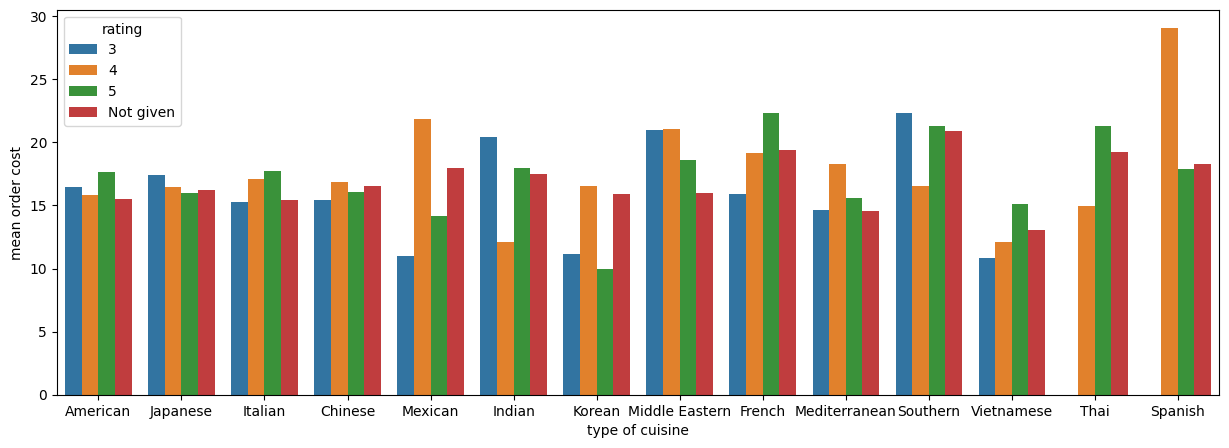

In [ ]:
plt.figure(figsize = (15,5))

sns.barplot(x = 'cuisine_type', y = 'cost_of_the_order', data = df3, hue = 'rating', errorbar=('ci',0))

plt.ylabel('mean order cost')
plt.xlabel('type of cuisine')

plt.show();

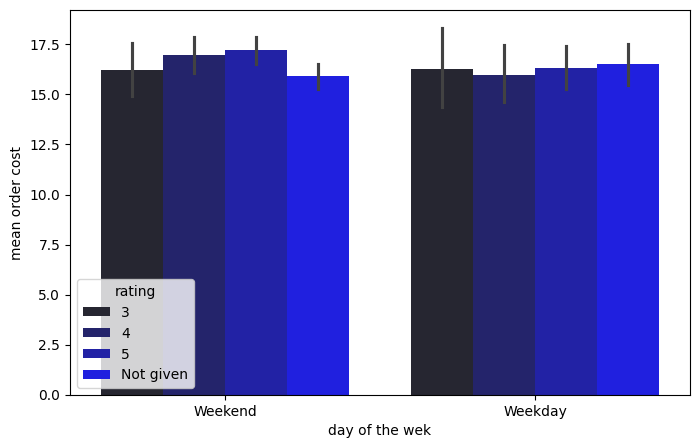

In [ ]:
plt.figure(figsize = (8,5))

sns.barplot(x = 'day_of_the_week', y = 'cost_of_the_order', data = df3, hue='rating', palette='dark:BLUE')

plt.ylabel('mean order cost')
plt.xlabel('day of the wek')

plt.show();

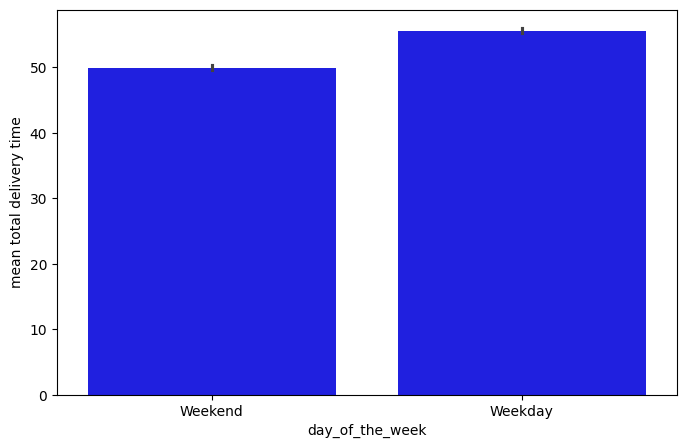

In [ ]:
plt.figure(figsize = (8,5))

sns.barplot(x = 'day_of_the_week', y = 'total_delivery_time', data = df3, color = 'BLUE')

plt.ylabel('mean total delivery time')
plt.xlabel('day_of_the_week')

plt.show();

#### Observations:



*   There is not a strong positive or negative correlation between numeric variables

*   Slightly more expensive orders seem to have a slightly better rating. Higher end restaurant are better?

*   The mean delivery, prep, and total time dont have a big effect on rating, as the delivery times seem pretty uniform


*   One big issue with the data is the "Not given" rating and having no ratings that are less than 3.

*  The total delivery time of orders on weekend's are quicker than during the week. This could be because there is more staff available both in the kitchen and in terms of delivery drivers.

*  The order cost is about the same over the weekend as it is during the week.

* The Spanish cuisine has a lot of 4 and 5 ratings when given, and no 3 ratings.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
#set net revenue variable at 0
#iterate through cost_of_the_order column and apply instructions from question. We can ignore orders whose cost is <= 5$
net_rev = 0

for label, cost in df['cost_of_the_order'].items():
  if cost > 20:
    net_rev = net_rev + (cost * 0.25)
  elif cost > 5:
    net_rev = net_rev + (cost * 0.15)

print(net_rev)

6166.302999999994


#### Observations:

The approximate net revenue is 6166.30 $.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
#for this problem, rather than assuming what a "not given" rating is, im not going to account for not given ratings and simply remove them
df1 = df.copy(deep=True)

In [ ]:
#replacing values of rating that are "Not given" to NaN
df1['rating'].replace('Not given', np.nan, inplace=True)
#removing rows where rating = NaN
df1 = df1[df1['rating'].notna()]

In [ ]:
#find the restaurants with over 50 rating count
df1 = df1[df1.groupby('restaurant_name')['rating'].transform('size') > 50]

In [ ]:
df1.groupby('restaurant_name')['rating'].value_counts()

restaurant_name            rating
Blue Ribbon Fried Chicken  5         32
                           4         21
                           3         11
Blue Ribbon Sushi          5         32
                           4         25
                           3         16
Shake Shack                5         60
                           4         50
                           3         23
The Meatball Shop          5         53
                           4         21
                           3         10
Name: count, dtype: int64

In [ ]:
df1['rating'] = df1['rating'].astype('int')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 3 to 1888
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               354 non-null    int64  
 1   customer_id            354 non-null    int64  
 2   restaurant_name        354 non-null    object 
 3   cuisine_type           354 non-null    object 
 4   cost_of_the_order      354 non-null    float64
 5   day_of_the_week        354 non-null    object 
 6   rating                 354 non-null    int64  
 7   food_preparation_time  354 non-null    int64  
 8   delivery_time          354 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 27.7+ KB


In [ ]:
#find mean rating of each restaurant
df1.groupby('restaurant_name')['rating'].mean()

restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64

#### Observations:

Given the my method: rather than assuming what a "not given" rating is, im not going to account for "not given" ratings and simply remove them. There are 4 restaurants with over 50 ratings count and an average rating aboive 4. Those are (in order of highest mean rating):
1. the meatball shop - 4.5
2. blue ribbon fried chicken - 4.3
3. shake shack - 4.3
4. blue ribbon sushi - 4.1

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

In [ ]:
mask = df['total_time'] > 60

In [ ]:
print(mask.sum()/1898)

0.1053740779768177


#### Observations:

About 10.5% of orders take more than 60 mins to get delivered from the time it was placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:

The mean delivery time during the weekday is longer sitting at about 28 mins while on the weekend the mean delivery time is about 6 mins shorter sitting at about 22 mins.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   total_time             1898 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 148.4+ KB


### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

### Conclusions:
*  A lot of orders dont have a rating. The lowest rating in the dataset is 3.
*  Most orders are placed over the weekend.
*  The time variables don't have a big effect on rating. This could mean that customers are satisfied with the current time it takes to receive their order.
*  Some customers use foodhub much more often, but most use it a couple of times.
*  Same goes for restaurants, there are clear leaders in popularity.
*  Cost of the order doesn't have a big impact on rating, and it is also similar regardless of the day of the week.

### Recommendations:

*  Incentivize customers to leave a rating. Could offer coupons, promotional discount, free delivery (if there's a delivery fee), etc. This would allow foodhub to gather even more data and minimize the number of "Not given" ratings. It will also give foodhub a better idea of which restaurants are working well and which should maybe be removed from the platform.
*  Most orders are done over the weekend -- This means that only 2 days of the week are high traffic. We would want to find a way to maximize orders during the week too. This could be charging restaurants lower fees during the week and in turn reducing the cost customers would need to pay, or just like the point before, offer promotional discounts.
*  Offer returning customers of foodhub perks within the app. Set up a loyalty system where every order you earn X points, and those points can be cashed in for rewards once a certain threshold is met. This will help with customer rentention.
*  Giving the most popular restaurants who have an average rating above 4 advertisement space is a good idea. As it will expose customers to new food that already has good ratings. This will boost customer engagement with the app. If a customer likes the food then they are more likely to return to the app.
*  Surprised to see how little of an effect cost had on the rating of an order, and how similar cost was regardless of the day of the week. Foodhub could look into increasing their prices by a small percentage (especially during the weekend) and see if there's still little effect on price. There is potentially more money to be made here.

---